# Demo of Lanczos filter



### NCSU Tropical and Large Scale Dynamics
### Python for Atmospheric Science

- A. Aiyyer


## Citations for this code:
        
- Duchon C. E. (1979) Lanczos Filtering in One and Two Dimensions. Journal of Applied Meteorology, Vol 18, pp 1016-1022.
        
Filter Weight function taken from:
- https://scitools-iris.readthedocs.io/en/v3.0.1/generated/gallery/general/plot_SOI_filtering.html
    


## Data Source

Code uses: SOI_Darwin.nc 

- https://www.ncl.ucar.edu/Applications/Data/cdf/SOI_Darwin.nc


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr


In [2]:
def low_pass_weights(window, cutoff):
    """Calculate weights for a low pass Lanczos filter.

    Args:

    window: int
        The length of the filter window.

    cutoff: float
        The cutoff frequency in inverse time steps.

    """
    order = ((window - 1) // 2) + 1
    nwts = 2 * order + 1
    w = np.zeros([nwts])
    n = nwts // 2
    w[n] = 2 * cutoff
    k = np.arange(1.0, n)
    sigma = np.sin(np.pi * k / n) * n / (np.pi * k)
    firstfactor = np.sin(2.0 * np.pi * cutoff * k) / (np.pi * k)
    w[n - 1 : 0 : -1] = firstfactor * sigma
    w[n + 1 : -1] = firstfactor * sigma
    return w[1:-1]


In [40]:
def main():
    # Load the monthly-valued Southern Oscillation Index (SOI) time-series.    
    file_path='./SOI_Darwin.nc'
    ds = xr.open_dataset(file_path)
 
    soi = ds.DSOI
    
    # Window length for filters.
    window = 121

    # Construct 2-year (24-month) and 7-year (84-month) low pass filters
    # for the SOI data which is monthly.   
    
    
    data_dt = 1.0         # 1 month interval for monthly SOI data
    period_cut_off = 24.0 # same units as data_dt. So 24 means 2 years
    
    freq = data_dt/period_cut_off
    wgts_2y = xr.DataArray(low_pass_weights(window, freq ), dims = ['window'])

 
    
    
    period_cut_off = 84.0 # same units as data_dt. So 84 means 7 years
    freq = data_dt/period_cut_off
    wgts_7y = xr.DataArray(low_pass_weights(window, freq), dims = ['window'])
       
    
    # plot the weights
    
    fig, ax =  plt.subplots(nrows=2, ncols=1, figsize=(18,6))
    
    wgts_2y.plot(linewidth=1, color='gray', ax=ax[0])
    wgts_7y.plot(linewidth=1, color='gray', ax=ax[1])    
    ax[0].set_title("(a) Weights (2 year low pass)", loc="left", fontsize=18) 
    ax[0].set_xlabel('', fontsize=18)
    ax[0].set_ylabel('weight', fontsize=13)    
    ax[1].set_title("(b) Weights (7 year low pass)", loc="left", fontsize=18) 
    ax[1].set_xlabel('', fontsize=18)
    ax[1].set_ylabel('weight', fontsize=13)    
    
    plt.show()
    
    
    data_fil_2y = soi.rolling(time = len(wgts_2y), center = True).construct('window').dot(wgts_2y)
    data_fil_7y = soi.rolling(time = len(wgts_7y), center = True).construct('window').dot(wgts_7y)

    
    fig, ax =  plt.subplots(nrows=1, ncols=1, figsize=(18,6))
    soi.plot(linewidth=1, color='gray', ax=ax,label="no filter")
    data_fil_2y.plot(linewidth=2, color='orange', ax=ax)
    data_fil_7y.plot(linewidth=2, color='magenta', ax=ax)
    ax.legend(["No Filter", "2 Y Low Pass", "7 Y Low Pass"])
    ax.set_title("SOI", loc="left", fontsize=18) 
    plt.show()


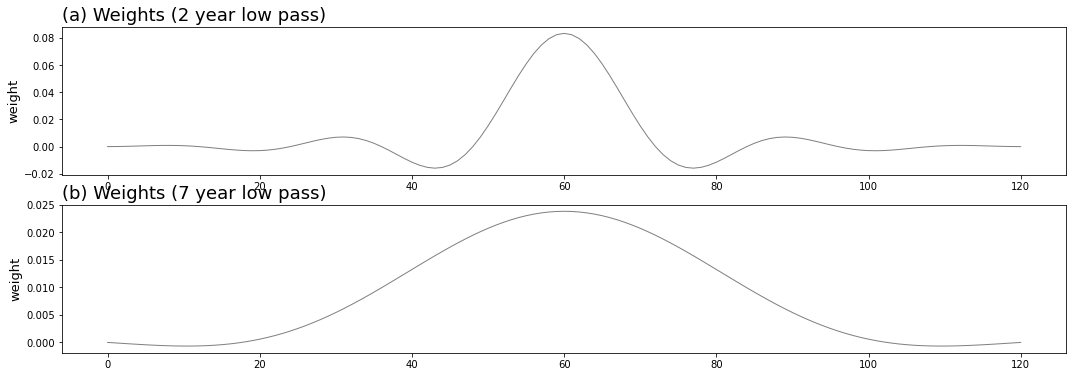

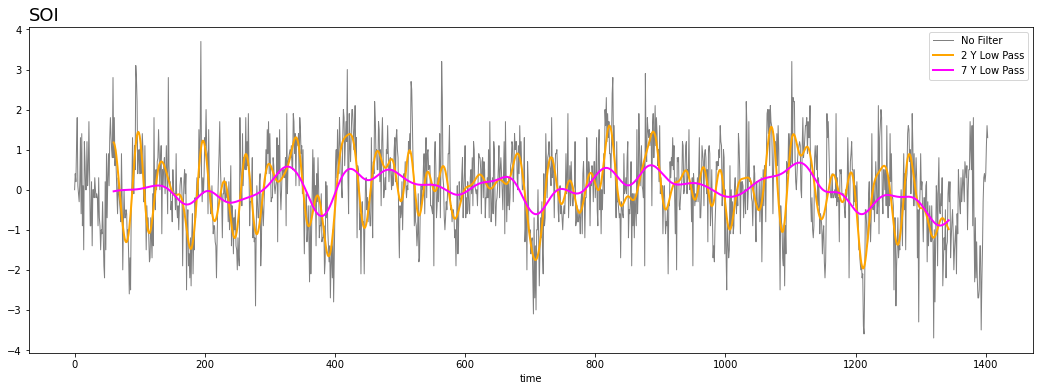

In [41]:
if __name__ == "__main__":
    main()